![digitizing_team](digitizing_team.png)


DigiNsure Inc. is an innovative insurance company focused on enhancing the efficiency of processing claims and customer service interactions. Their newest initiative is digitizing all historical insurance claim documents, which includes improving the labeling of some IDs scanned from paper documents and identifying them as primary or secondary IDs.

To help them in their effort, you'll be using multi-modal learning to train an Optical Character Recognition (OCR) model. To improve the classification, the model will use **images** of the scanned documents as input and their **insurance type** (home, life, auto, health, or other). Integrating different data modalities (such as image and text) enables the model to perform better in complex scenarios, helping to capture more nuanced information. The **labels** that the model will be trained to identify are of two types: a primary and a secondary ID, for each image-insurance type pair.

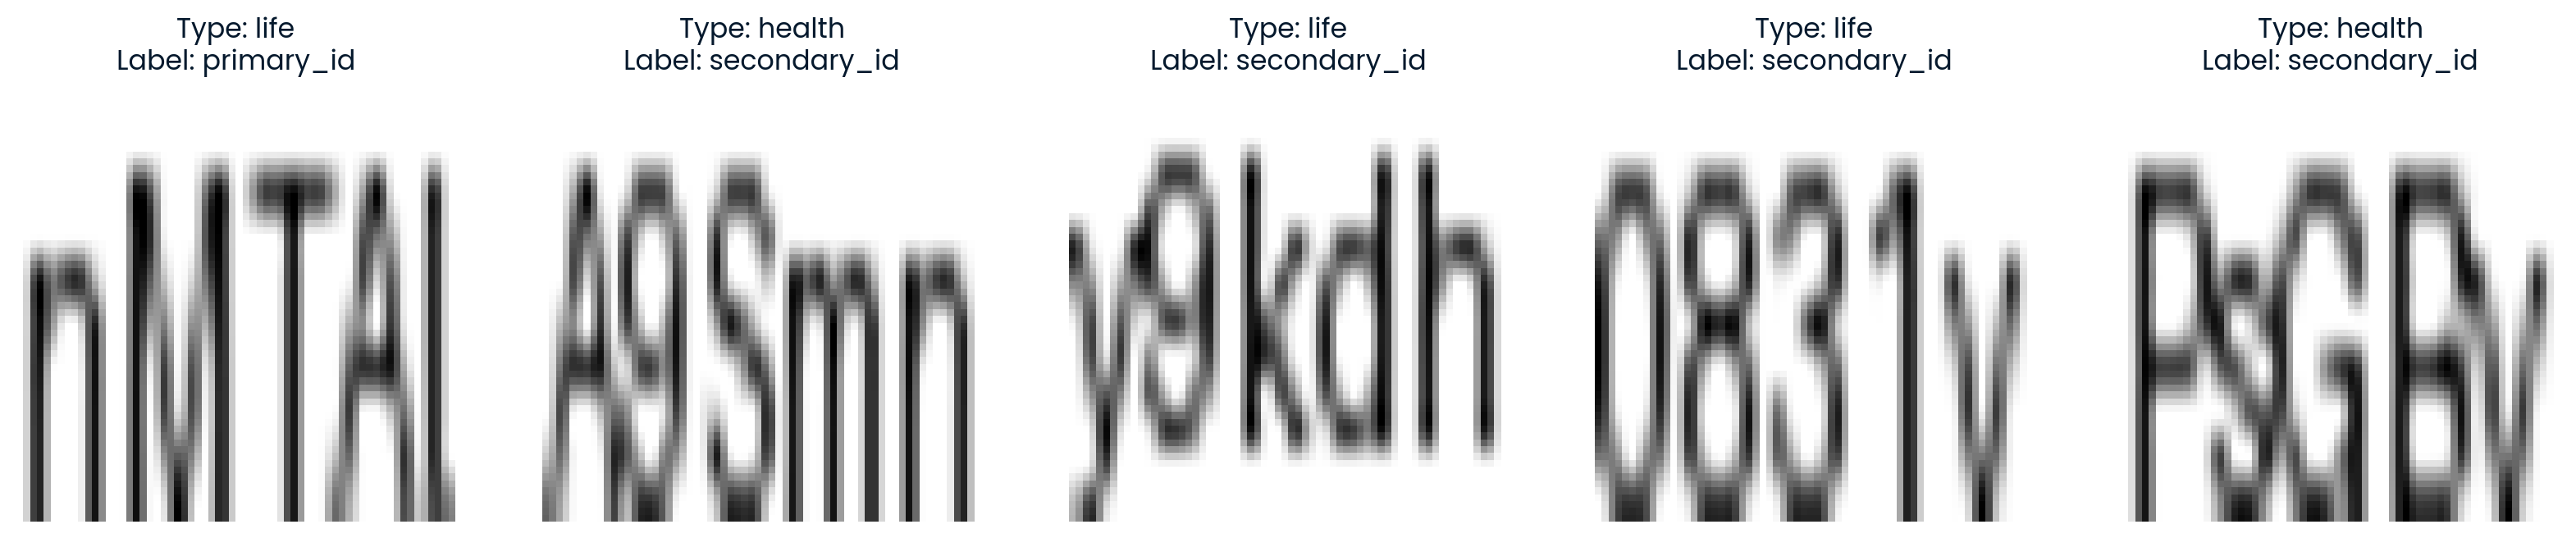

In [144]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from project_utils import ProjectDataset
import pickle  # for data load and save . also use for model result etc . pandas only support tablular data . 
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Load the data
dataset = pickle.load(open('ocr_insurance_dataset.pkl', 'rb'))

# Define a function to visualize codes with their corresponding types and labels 
def show_dataset_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, min(num_images, len(dataset)), figsize=(20, 4))
    for ax, idx in zip(axes, np.random.choice(len(dataset), min(num_images, len(dataset)), False)):
        img, lbl = dataset[idx]
        ax.imshow((img[0].numpy() * 255).astype(np.uint8).reshape(64,64), cmap='gray'), ax.axis('off')
        ax.set_title(f"Type: {list(dataset.type_mapping.keys())[img[1].tolist().index(1)]}\nLabel: {list(dataset.label_mapping.keys())[list(dataset.label_mapping.values()).index(lbl)]}")
    plt.show()

# Inspect 5 codes images from the dataset
show_dataset_images(dataset)

In [145]:
class OCRModel(nn.Module):
    def __init__(self):
        super(OCRModel , self).__init__()
        # For image 
        self.image_layer= nn.Sequential(
            nn.Conv2d(1,16,kernel_size=3,padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ELU(),
            nn.Flatten(),   # convert 2d image to 1d
            nn.Linear(16*32*32 , 128)
        )
        # For type 
        self.type_layer= nn.Sequential(
            nn.Linear(5,10),
            nn.ELU(),
        )
        # Concatenete the output of the previous layer 
        self.classifier= nn.Sequential(
            nn.Linear(128+10,64),
            nn.ELU(),
            nn.Linear(64,2)
        )
    # Way through how the data will flow within the layers
    def forward(self,x_image,x_type):
        x_image=self.image_layer(x_image)
        x_type =self.type_layer(x_type)
        x=torch.cat((x_image,x_type),dim=1)
        return self.classifier(x)

In [146]:
# Load data in batchs
train_dataloader = DataLoader(dataset , batch_size =20 ,shuffle = True )


In [147]:
# Loss function and the optiminzer 
model = OCRModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr= 0.001)

In [148]:
# Traing Loop
for epoch in range(20):
    for (image , type ) , labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(image, type)
        loss = criterion(outputs , labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} , Loss : {loss.item()}")

Epoch 1 , Loss : 0.6799590587615967
Epoch 2 , Loss : 0.6989873647689819
Epoch 3 , Loss : 0.673556923866272
Epoch 4 , Loss : 0.7162930965423584
Epoch 5 , Loss : 0.6972402334213257
Epoch 6 , Loss : 0.6815537810325623
Epoch 7 , Loss : 0.6807397603988647
Epoch 8 , Loss : 0.690015435218811
Epoch 9 , Loss : 0.6814825534820557
Epoch 10 , Loss : 0.7015848755836487
Epoch 11 , Loss : 0.7054287195205688
Epoch 12 , Loss : 0.6914343237876892
Epoch 13 , Loss : 0.6916453242301941
Epoch 14 , Loss : 0.7023454904556274
Epoch 15 , Loss : 0.6795750856399536
Epoch 16 , Loss : 0.6949806213378906
Epoch 17 , Loss : 0.6832528710365295
Epoch 18 , Loss : 0.6957110166549683
Epoch 19 , Loss : 0.6699641942977905
Epoch 20 , Loss : 0.6848296523094177
